In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Datasets/forest_covtype.csv")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
print("Dataset shape:", data.shape)
print("Dataset columns:", data.columns)

Dataset shape: (581012, 55)
Dataset columns: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soi

In [5]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [10]:
scaled_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points']
for col in scaled_cols:
  scaler = StandardScaler()
  data[[col]] = pd.DataFrame(
    data=scaler.fit_transform(data[[col]]),
    index=data.index,
    columns=[col]
  )

In [11]:
def plot_count(y):
  before_dist = Counter(y)
  print("Before undersampling: ", before_dist)
  plt.xlabel("Count")
  plt.ylabel("Cover Type")
  plt.title("Count of each cover type")
  plt.bar(before_dist.keys(), before_dist.values())

Before undersampling:  Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


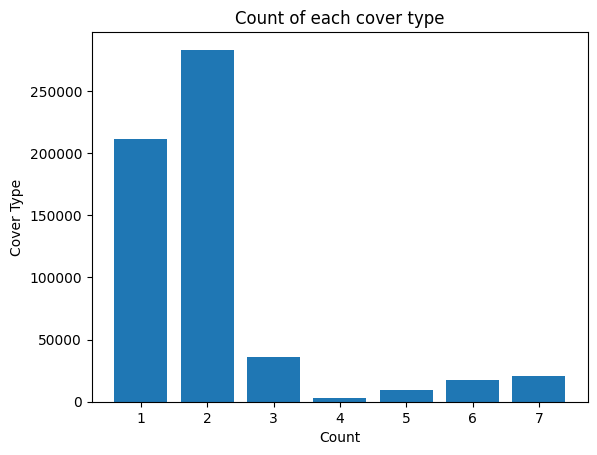

In [12]:

X = data.drop('Cover_Type', axis = 1)
y = data['Cover_Type']

plot_count(y)

Before undersampling:  Counter({1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747})


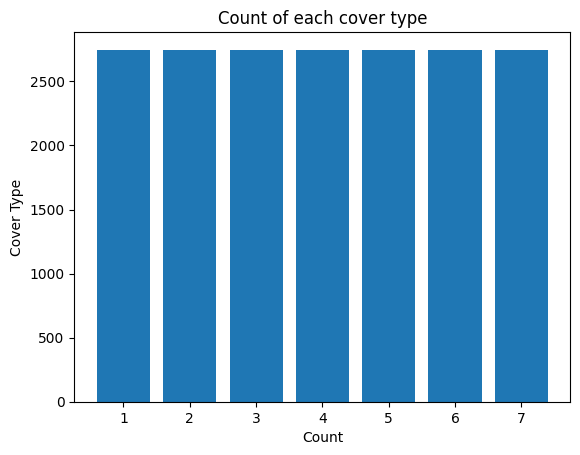

In [13]:
undersample = RandomUnderSampler(sampling_strategy='not minority')
X, y = undersample.fit_resample(X, y)
plot_count(y)

In [15]:
X_train, _X, y_train, _y = train_test_split(X, y, train_size=0.8)

X_test, X_val, y_test, y_val = train_test_split(_X, _y, train_size = 0.5)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(15383, 54)
(1923, 54)
(1923, 54)


In [16]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
accuracy = clf.score(X_test, y_test)
print(f"Accuracy = {accuracy}\n")
print(f"F1 Score = {f1}\n")


Accuracy = 0.7436297451898076

F1 Score = 0.7420063572526503



[[186  52   0   0  15   0  25]
 [ 54 153   5   0  53   7   1]
 [  0   1 193  37   8  59   0]
 [  0   0   7 239   0   7   0]
 [  4  19   9   0 214   9   0]
 [  0   5  51  27   4 197   0]
 [ 30   1   2   0   1   0 248]]


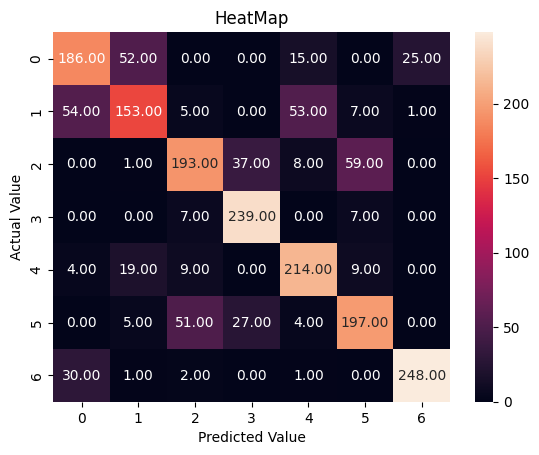

In [35]:
print(cm)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.title('HeatMap')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [20]:
sub_X_train = X.iloc[:, 0:2]
sub_y_train = y

sub_train = sub_X_train.join(sub_y_train)
sub_train = sub_train[sub_train['Cover_Type'].isin([1,2,3])]

sub_X = sub_train.drop('Cover_Type', axis = 1)
sub_y = sub_train['Cover_Type']

Before undersampling:  Counter({1: 2747, 2: 2747, 3: 2747})


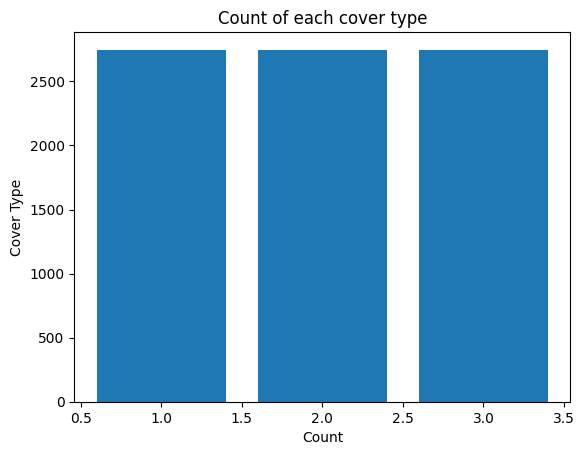

In [21]:
plot_count(sub_y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, sub_y, train_size=0.8)

In [24]:
regr = LogisticRegression(multi_class='multinomial')
model = regr.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f"Accuracy (Test) = {model.score(X_test, y_test)}")
print(f"Accuracy (Train) = {model.score(X_train, y_train)}")
print(f"F1 Score (Test)= {f1_score(y_test, y_pred_test, average='macro')}")
print(f"F1 Score (Train)= {f1_score(y_train, y_pred_train, average='macro')}")

Accuracy (Test) = 0.7841115827774409
Accuracy (Train) = 0.7686589805825242
F1 Score (Test)= 0.7828772710371963
F1 Score (Train)= 0.7671680969339597


In [25]:
df_train = X_train
df_train['CoverType'] = y_train
df_train

,Elevation,Aspect,CoverType
1920,0.430862,-0.568803,1
1138,-0.015591,-1.069189,1
5469,0.209421,1.093193,2
5407,-0.454901,-0.372223,2
2487,0.830884,-1.006641,1
...,...,...,...
7889,-1.912125,0.566001,3
633,0.920175,-0.997705,1
6108,-0.890640,-0.622416,3
5953,-3.294344,-0.166707,3


In [26]:
df_test = X_test
df_test['CoverType'] = y_test
df_test

,Elevation,Aspect,CoverType
4313,-0.379897,-0.148836,2
7691,-1.676397,-0.818996,3
3411,0.459435,-1.328317,2
6288,-2.122851,1.486353,3
2079,0.112987,1.700804,1
...,...,...,...
2923,0.773738,-0.693899,2
3881,0.830884,0.834065,2
4801,-0.458473,1.441676,2
2254,0.045126,-0.649222,1


In [27]:
df_pred_test = X_test
df_pred_test['CoverType'] = y_pred_test
df_pred_test

,Elevation,Aspect,CoverType
4313,-0.379897,-0.148836,2
7691,-1.676397,-0.818996,3
3411,0.459435,-1.328317,1
6288,-2.122851,1.486353,3
2079,0.112987,1.700804,2
...,...,...,...
2923,0.773738,-0.693899,1
3881,0.830884,0.834065,1
4801,-0.458473,1.441676,2
2254,0.045126,-0.649222,2


In [28]:
df_pred_train = X_train
df_pred_train['CoverType'] = y_pred_train
df_pred_train

,Elevation,Aspect,CoverType
1920,0.430862,-0.568803,1
1138,-0.015591,-1.069189,2
5469,0.209421,1.093193,2
5407,-0.454901,-0.372223,2
2487,0.830884,-1.006641,1
...,...,...,...
7889,-1.912125,0.566001,3
633,0.920175,-0.997705,1
6108,-0.890640,-0.622416,2
5953,-3.294344,-0.166707,3


In [29]:
df_trains = [df_train[df_train['CoverType'] == i] for i in [1, 2, 3]]
df_tests = [df_test[df_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_tests = [df_pred_test[df_pred_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_trains = [df_pred_train[df_pred_train['CoverType'] == i] for i in [1, 2, 3]]

In [30]:
def plot_scatter(title, dfs):
  plt.xlabel("Aspect")
  plt.ylabel("Elevation")
  plt.title(title)
  for _df in dfs:
    plt.scatter(_df['Aspect'], _df['Elevation'])

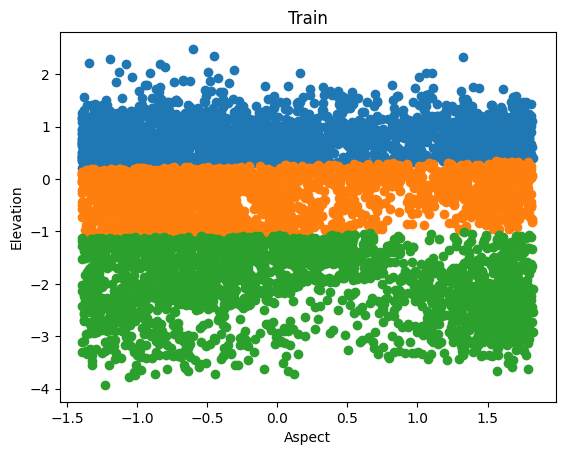

In [31]:
plot_scatter("Train", df_trains)

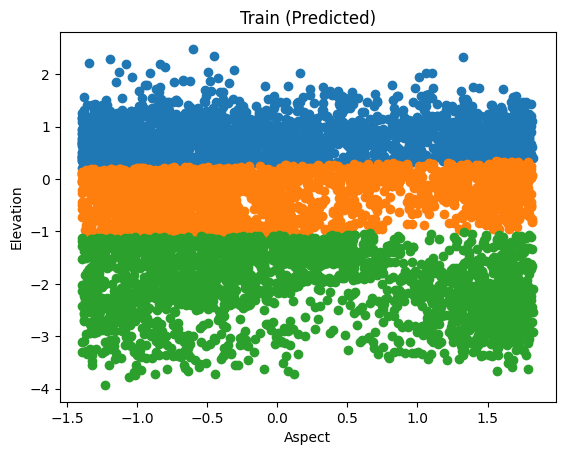

In [32]:
plot_scatter("Train (Predicted)", df_pred_trains)

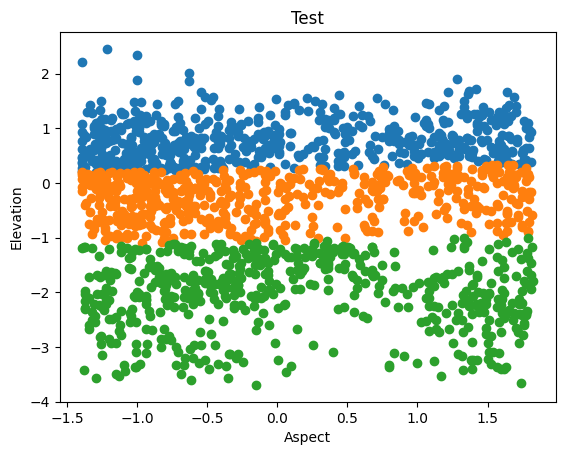

In [33]:
plot_scatter("Test", df_tests)

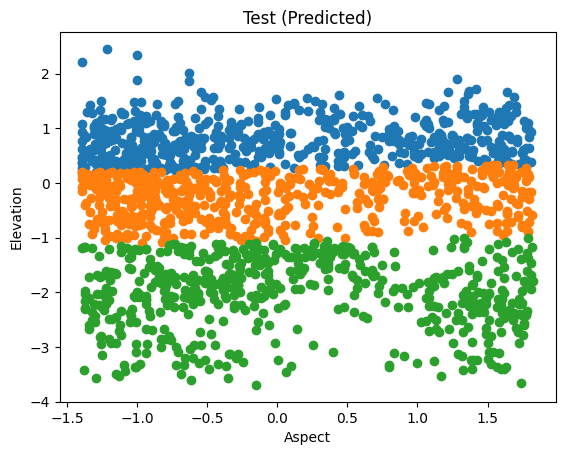

In [34]:
plot_scatter("Test (Predicted)", df_pred_tests)